In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from statistics import mean
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')
import seaborn 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import normalize


%matplotlib inline

In [87]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data']],
                     columns= iris['feature_names'] )
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [88]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [89]:
df_normalized = normalize(df)
df_normalized

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

### 1) KMeans without PCA

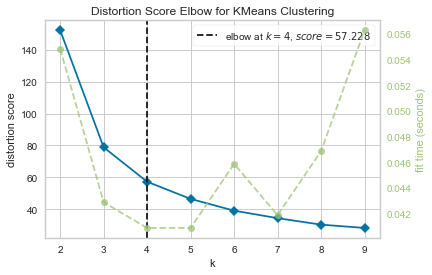

In [3]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)        
visualizer.show()

In [97]:
kmeans = KMeans(4)

kmeans.fit(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])

df["kmeans"] = kmeans.labels_

# fg = seaborn.FacetGrid(data=df, hue='kmeans', aspect=1.61)
# fg.map(plt.scatter,"sepal length (cm)","sepal width (cm)").add_legend()


# fg = seaborn.FacetGrid(data=df, hue='kmeans', aspect=1.61)
# fg.map(plt.scatter,"petal length (cm)","petal width (cm)").add_legend()

In [19]:
# pd.plotting.scatter_matrix(df, alpha=0.2)

In [20]:
score_KMeans = silhouette_score(df, df["kmeans"], metric='euclidean')
print(f"KMeans cluster score : {score_KMeans}")


KMeans cluster score : 0.7055328350352068


### 2) KMeans with PCA

- k = 3

In [90]:
pca_3 = PCA(n_components=3)
PCA_transform_3 = pca_3.fit_transform(df_normalized)

In [85]:
PCA_df_3 = pd.DataFrame(data = PCA_transform_3, columns = ['feature_1', 'feature_2','feature_3'])
PCA_df_3

,feature_1,feature_2,feature_3
0,0.301637,0.000716,-0.000478
1,0.270921,0.042354,-0.013049
2,0.297679,0.002407,-0.002916
3,0.262666,0.002667,0.014163
4,0.307469,-0.018719,0.008060
...,...,...,...
145,-0.165452,-0.019962,-0.047937
146,-0.185297,0.018296,-0.028373
147,-0.162955,-0.016189,-0.016653
148,-0.172977,-0.081485,-0.011549


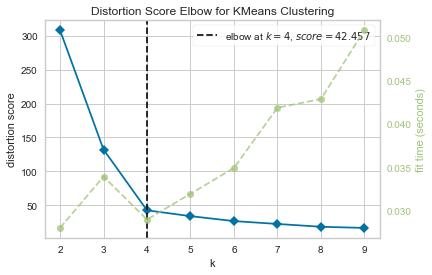

In [62]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(PCA_df_3)        
visualizer.show()

In [74]:
kmeans = KMeans(4)

kmeans.fit(PCA_df_3[['feature_1', 'feature_2','feature_3']])

PCA_df_3["kmeans"] = kmeans.labels_

# fg = seaborn.FacetGrid(data=PCA_df_3, hue='kmeans', aspect=2)
# fg.map(plt.scatter,"feature_1", "feature_2").add_legend()


In [73]:
score_KMeans = silhouette_score(PCA_df_3, PCA_df_3["kmeans"], metric='euclidean')
print(score_KMeans)

0.8047107024804606


- k = 2

In [47]:
pca_2 = PCA(n_components=2)
PCA_transform_2 = pca_2.fit_transform(df)

In [48]:
PCA_df_2 = pd.DataFrame(data = PCA_transform_2, columns = ['feature_1', 'feature_2'])
PCA_df_2

,feature_1,feature_2
0,-2.690344,-0.305854
1,-2.721299,-0.274272
2,-2.890839,-0.325212
3,-2.751597,-0.281161
4,-2.733472,-0.320949
...,...,...
145,2.275923,-1.171632
146,1.171196,1.688741
147,1.403656,1.705377
148,2.234754,-1.196789


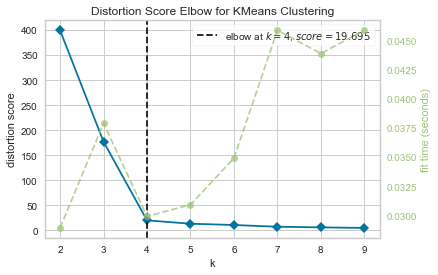

In [65]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(PCA_df_2)        
visualizer.show()

In [98]:
kmeans = KMeans(4)

kmeans.fit(PCA_df_2[['feature_1', 'feature_2']])

PCA_df_2["kmeans"] = kmeans.labels_

# fg = seaborn.FacetGrid(data=PCA_df_2, hue='kmeans', aspect=2)
# fg.map(plt.scatter,"feature_1", "feature_2").add_legend()


In [72]:
score_KMeans = silhouette_score(PCA_df_2, PCA_df_2["kmeans"], metric='euclidean')
print(score_KMeans)

0.8763524861722757


- k = 1

In [51]:
pca_1 = PCA(n_components=1)
PCA_transform_1 = pca_1.fit_transform(df)

In [52]:
PCA_df_1 = pd.DataFrame(data = PCA_transform_1, columns = ['feature_1'])
PCA_df_1

,feature_1
0,-2.690344
1,-2.721299
2,-2.890839
3,-2.751597
4,-2.733472
...,...
145,2.275923
146,1.171196
147,1.403656
148,2.234754


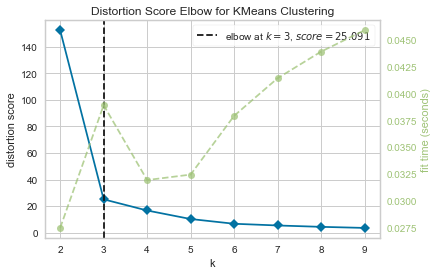

In [55]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(PCA_df_1)        
visualizer.show()

In [71]:
kmeans = KMeans(3)

kmeans.fit(PCA_df_1[['feature_1']])

PCA_df_1["kmeans"] = kmeans.labels_

score_KMeans = silhouette_score(PCA_df_1, PCA_df_1["kmeans"], metric='euclidean')
print(score_KMeans)

0.8515220596777195


---------------------------------------------------------
### 3) hirarecal without PCA

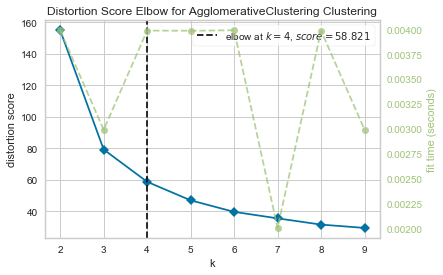

In [92]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)        
visualizer.show()

In [96]:
hac = AgglomerativeClustering(4)

hac.fit(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])

df["hac"] = hac.labels_


In [95]:
score_hac = silhouette_score(df, df["hac"], metric='euclidean')
print(score_hac)

0.6449163430193372



### 4) hirarecal with PCA

- k=3

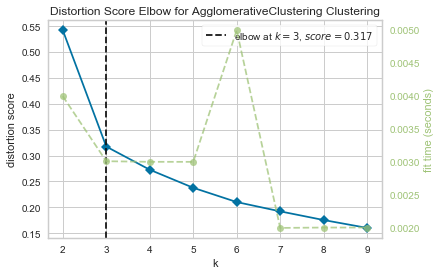

In [99]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(PCA_df_3)        
visualizer.show()

In [102]:
hac = AgglomerativeClustering(3)

hac.fit(PCA_df_3[['feature_1', 'feature_2','feature_3']])

PCA_df_3["hac"] = hac.labels_
score_hac = silhouette_score(PCA_df_3, PCA_df_3["hac"], metric='euclidean')
print(score_hac)

0.9452922692947463


- k = 2

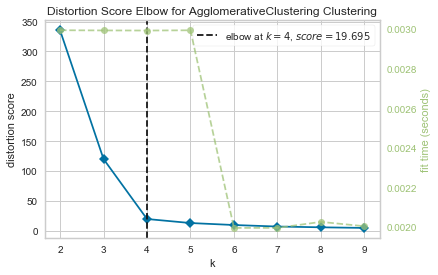

In [103]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(PCA_df_2)        
visualizer.show()

In [104]:
hac = AgglomerativeClustering(4)

hac.fit(PCA_df_2[['feature_1', 'feature_2']])

PCA_df_2["hac"] = hac.labels_
score_hac = silhouette_score(PCA_df_2, PCA_df_2["hac"], metric='euclidean')
print(score_hac)

0.8789582716847929


- k = 1

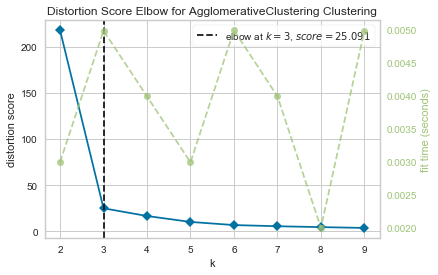

In [105]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(PCA_df_1)        
visualizer.show()

In [106]:
hac = AgglomerativeClustering(3)

hac.fit(PCA_df_1[['feature_1']])

PCA_df_1["hac"] = hac.labels_
score_hac = silhouette_score(PCA_df_1, PCA_df_1["hac"], metric='euclidean')
print(score_hac)

0.8709864955596277


------------------------------------
### 5) DBSCAN without PCA

In [123]:
clustering = DBSCAN(eps=1, min_samples=3).fit(df)
df["dbs"] = clustering.labels_
df["dbs"].unique()

array([ 0,  1,  2, -1,  3,  4], dtype=int64)

In [120]:
labels =df["dbs"]
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")

number of clusters 6
number of noise 4


In [122]:
score_DBSCAN = silhouette_score(df, df["dbs"], metric='euclidean')
print(f"DBSCAN cluster score : {score_DBSCAN}")

DBSCAN cluster score : 0.7023788530944548


### 6) DBSCAN with PCA

- k = 3

In [127]:
clustering = DBSCAN(eps=1, min_samples=3).fit(PCA_df_3)
PCA_df_3["dbs"] = clustering.labels_
PCA_df_3["dbs"].unique()

array([0, 1, 2], dtype=int64)

In [128]:
labels =PCA_df_3["dbs"]
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")

number of clusters 3
number of noise 0


In [129]:
score_DBSCAN = silhouette_score(PCA_df_3, PCA_df_3["dbs"], metric='euclidean')
print(f"DBSCAN cluster score : {score_DBSCAN}")

DBSCAN cluster score : 0.9648723473567581


- k = 2

In [130]:
clustering = DBSCAN(eps=1, min_samples=3).fit(PCA_df_2)
PCA_df_2["dbs"] = clustering.labels_
PCA_df_2["dbs"].unique()

array([0, 1, 2, 3], dtype=int64)

In [131]:
labels =PCA_df_2["dbs"]
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")

number of clusters 4
number of noise 0


In [132]:
score_DBSCAN = silhouette_score(PCA_df_2, PCA_df_2["dbs"], metric='euclidean')
print(f"DBSCAN cluster score : {score_DBSCAN}")

DBSCAN cluster score : 0.8881632256766374


- k = 1

In [133]:
clustering = DBSCAN(eps=1, min_samples=3).fit(PCA_df_1)
PCA_df_1["dbs"] = clustering.labels_
PCA_df_1["dbs"].unique()

array([ 0,  1,  2,  3, -1], dtype=int64)

In [134]:
labels =PCA_df_1["dbs"]
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")

number of clusters 5
number of noise 1


In [135]:
score_DBSCAN = silhouette_score(PCA_df_1, PCA_df_1["dbs"], metric='euclidean')
print(f"DBSCAN cluster score : {score_DBSCAN}")

DBSCAN cluster score : 0.8001967839753199


-----------------------------------
### 7) Gaussian without PCA

In [138]:
gm = GaussianMixture(2)
gm.fit(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])
df["gm"] = gm.predict(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])



In [139]:
probs = gm.predict_proba(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])
print(probs[:10].round(3))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [142]:
score_Gaussian = silhouette_score(df, df["gm"], metric='euclidean')
print(f"Gaussian cluster score : {score_Gaussian}")

Gaussian cluster score : 0.5408512619141773


In [148]:
gm_3 = GaussianMixture(3)
gm_3.fit(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])
df["gm_3"] = gm_3.predict(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])

probs_3 = gm_3.predict_proba(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])
print(probs_3[:10].round(3))

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [149]:
score_Gaussian = silhouette_score(df, df["gm_3"], metric='euclidean')
print(f"Gaussian cluster score : {score_Gaussian}")

Gaussian cluster score : 0.5861948247332106


In [145]:
gm_2 = GaussianMixture(4)
gm_2.fit(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])
df["gm_2"] = gm_2.predict(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])

probs_2 = gm_2.predict_proba(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])
print(probs_2[:10].round(3))

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [144]:
score_Gaussian = silhouette_score(df, df["gm_2"], metric='euclidean')
print(f"Gaussian cluster score : {score_Gaussian}")

Gaussian cluster score : 0.5625298649757373


-----------------------------------
### 8) Gaussian with PCA

In [ ]:
pca_3 = PCA(n_components=3)
PCA_transform_3 = pca_3.fit_transform(df_normalized)

PCA_df_3 = pd.DataFrame(data = PCA_transform_3, columns = ['feature_1', 'feature_2','feature_3'])
PCA_df_3


PCA_df_2
PCA_df_1


model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(PCA_df_3)        
visualizer.show()



kmeans = KMeans(4)

kmeans.fit(PCA_df_3[['feature_1', 'feature_2','feature_3']])

PCA_df_3["kmeans"] = kmeans.labels_



score_KMeans = silhouette_score(PCA_df_3, PCA_df_3["kmeans"], metric='euclidean')
print(score_KMeans)

- k = 3

In [154]:
gm_2 = GaussianMixture(2)
gm_2.fit(PCA_df_3[['feature_1', 'feature_2','feature_3']])
PCA_df_3["gm_2"] = gm_2.predict(PCA_df_3[['feature_1', 'feature_2','feature_3']])

probs_2 = gm_2.predict_proba(PCA_df_3[['feature_1', 'feature_2','feature_3']])
print(probs_2[:10].round(3))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [155]:
score_Gaussian = silhouette_score(PCA_df_3, PCA_df_3["gm_2"], metric='euclidean')
print(f"Gaussian cluster score : {score_Gaussian}")

Gaussian cluster score : 0.6205438863477855
